# Module 2 Numerical Integration (2 of n)


## Learning objectives

- improve the efficiency of our integration algorithms by using the trapezoid and Simpson's method
- utilize a published library to compute integrals

# Pre-class

* be ready to share your work on M2 ~~with your group~~, and discuss
* watch [Video 3.2](https://youtu.be/TzXShbDDE_o) (on log plots and exponents, will help with HW)
* read the text of this module, and be ready to ask questions and discuss the mathematics


## Group discussion: Numerical errors in integration methods 

Examine your work on previous HW problems: you should be able to observe that the errors in the left and right endpoint rules for numerical integration are proportional to $1/N$, where $N$ is the 
number of subintervals. The width of each subinterval is $h = (b-a)/N$, so we say the error in these methods "scales like" (is proportional to) $h$.

*If you don't observe this in your log-log plots .... ask an instructor ...*

Thus, if you want to reduce the error in a calculation by a factor of $10^6$, you must increase the number of subintervals 
by a factor of $10^6$. This requires $10^6$ times as many evaluations of the integrand $f(x)$. This might be fine for simple problems, 
with simple integrands. 
But for complicated integrands that require a lot of computer time to evaluate, this can be a problem. In those cases 
we need a more efficient integration scheme. 

The midpoint rule is better than the left or right endpoint rules; the errors in this method are proportional to $1/N^2$, 
or $h^2$. With the midpoint rule we can reduce the error by a factor of $10^6$ by increasing the number of subintervals 
by a factor of $1000$. This requires "only" $1000$ times as many evaluations of $f(x)$. 

Today, we'll find out: *can we do even better?* and what are the pros/cons of the different methods?



## Trapezoid rule

The errors for the left endpoint rule and the right endpoint rule are similar. To be precise, 
the order $h^2$ terms are the same apart from the overall sign, and the point of evaluation of $f''(x)$. The point of evaluation should 
not make much difference, assuming $h$ is small. This suggests that the errors in the left and right endpoint rules should be
approximately equal in magnitude but opposite in sign.  You might have noticed this from working with the 
left and right endpoint rules in the previous lesson. 

This observation leads us to the trapezoid rule for numerical integration. The trapezoid rule is obtained by 
taking the _average_ of the left and right endpoint rules. That is, we approximate the integral 

$$
	I = \int_a^b f(x)\,dx
$$

by 

$$
	I_T = \frac{1}{2} \left( I_L + I_R\right) = \sum_{i=0}^{N-1} \frac{1}{2} \left[ f(a + ih) + f(a + ih + h) \right] h
$$

![Integration trapezoids](https://upload.wikimedia.org/wikipedia/commons/a/a8/Calkowanie_numeryczne-metoda_trapezow.png)

Geometrically, the area for each subinterval is approximated as the area of a trapezoid that touches the curve $f(x)$ at both 
endpoints. Note that the trapezoid rule can be rearranged in this way:

$$
	I_T = \frac{h}{2}\left[ f(a) + f(b)\right] + \sum_{i=1}^{N-1} f(a+ih) h
$$

This result is important because it shows that the trapezoid rule requires only $N+1$ evaluations of the function $f(x)$. This is essentially the same as the number of evaluations required for the left endpoint, right endpoint, and midpoint rules, 
namely $N$. 

**Note:** In the second version, can you see how the $i=0$ and $i=N-1$ contributions to the sum are moved out of the sum? 




## Homework 3.3 ($\LaTeX{}$)

Consider the integral

$$
	I = \int_{-1}^1 \cos(x^2 - x) \, dx
$$

For the left endpoint rule, midpoint rule, and trapezoid rule, find (approximately) the number 
of subintervals required to achieve an error of about $\pm 10^{-4}$. In each case, how many function evaluations 
are required? 

In [28]:
import numpy as np
import pylab as py


## Variables/Constants
progress = 0        # I need this to track where I am in in my loop
decimals = 4        # Determines the accuracy
N_start = 110       # Starting number of N
N_end = 1000000     # Largest number of N
curr = 0            # Holds the value of the current approximation
step = 1            # Amount to increase N by each time
a = -1
b = 1


## Functions
def f(x):
    return np.cos((x**2) - x)

def leftpoint(f,a,b,N):
    dx = (b-a) / N   # Width
    x = np.linspace(a, b-dx, N)
    return np.sum(f(x)) * dx

def midpoint(f, a, b, N):
    dx = (b-a) / N
    x = np.linspace(a + dx/2, b - dx/2, N) 
    return np.sum(f(x)) * dx

def traprule(f, a, b, N):
    dx = (b-a) / N
    l = np.linspace(a, b-dx, N) # This calculates the left endpoint x-value
    r = np.linspace(a+dx, b, N) # This calculates the right endpoint x-value
    return np.sum( (f(l)+f(r)) * dx ) / 2


## Calculate the exact and approximations
exact = traprule(f, a, b, 1000000)
N = N_start
while N <= N_end:
    if progress == 0:
        curr = midpoint(f, a, b, N)
        if (round(exact, decimals) == round(curr, decimals)):
            print("\nUsing the MIDpoint rule, the approximated value was", round(curr, decimals))
            print("Approximately ",N," subintervals were needed to obtain an approximation accurate to +/-10^-4." )
            progress = 1            
    if progress == 1:       # If we finished finding I out to 3 sig figs...
        curr = traprule(f, a, b, N)
        if (round(exact, decimals) == round(curr, decimals)):
            print("\nUsing the trapezoid rule, the approximated value was", round(curr, decimals))
            print("Approximately ",N," subintervals were needed to obtain an approximation accurate to +/-10^-4." )
            progress = 2
            step = 100
    if progress == 2:       # If we finished finding I out to 4 sig figs...
        curr = leftpoint(f, a, b, N)
        if (round(exact, decimals) == round(curr, decimals)):
            print("\nUsing the LEFTpoint rule, the approximated value was", round(curr, decimals))
            print("Approximately ",N," subintervals were needed to obtain an approximation accurate to +/-10^-4." )
            progress = 3
            break

    N = N + step

print("\nA good approximation of the integral is", exact)
print("The trapezoid rule evaluates the function twice for each iteration. For 213 sub-intervals, there were 426 function evaluations")
print("The mid and left point approximations took 110 and 70,313 subintervals, with that many function evaluations, respectively.")



Using the MIDpoint rule, the approximated value was 1.5555
Approximately  110  subintervals were needed to obtain an approximation accurate to +/-10^-4.

Using the trapezoid rule, the approximated value was 1.5555
Approximately  213  subintervals were needed to obtain an approximation accurate to +/-10^-4.

Using the LEFTpoint rule, the approximated value was 1.5555
Approximately  70313  subintervals were needed to obtain an approximation accurate to +/-10^-4.

A good approximation of the integral is 1.5554701650966996
The trapezoid rule evaluates the function twice for each iteration. For 213 sub-intervals, there were 426 function evaluations
The mid and left point approximations took 110 and 70,313 subintervals, with that many function evaluations, respectively.


## Simpson's Rule

We have now identified two integration methods with errors (per subinterval) of order $h^3$. The midpoint rule has error 
${\cal E}_M$ in each subinterval. The trapezoid rule has error ${\cal E}_T$
in each subinterval. 
Some math would show that to leading order, ${\cal E}_T = -2{\cal E}_M$. This suggests 
that we can define a new integration method as a weighted sum of the midpoint and trapezoid rules, designed 
to cancel the order $h^3$ terms in the error. This leads to *Simpson's rule*:

$$
	I_S = \frac{1}{3} I_T + \frac{2}{3} I_M
$$

which can be written explicitly as

$$
	I_S = \frac{h}{6}\left\{ f(a) + f(b) + 2\sum_{i=1}^{N-1} f(a + ih) + 4\sum_{i=1}^N f(a+ih - h/2) \right\}
$$

Note that for implementation purposes, you could simply call the trapezoid and midpoint functions you've already written.

For Simpson's rule, the errors of order $h^3$ from the midpoint and trapezoid rules cancel. A complete analysis 
shows that the order $h^4$ terms in the error actually vanish as well. The leading non--zero term in the error is proportional 
to $h^5$. That is, for Simpson's rule, the error in each 
subinterval is order $h^5$. The total error for $N\sim 1/h$ subintervals 
is proportional to $Nh^5 \sim h^4$. 

Geometrically, Simpson's rule is obtained by approximating the area in each subinterval as the area under 
a parabola that matches the function $f(x)$ at each endpoint and at the midpoint. 
Simpson's rule is more efficient than any of the other integration methods we have discussed. If we want to reduce 
the error by a factor of $10^6$, we must increase the number of subintervals by a factor of 
$10^{6/4}\approx 32$. Note that Simpson's rule requires $2N + 1$ function evaluations. This is roughly twice as 
many evaluations as our other methods. However, the rapid reduction of error with a relatively small increase in $N$ 
will usually offset the extra function calls.  

# Homework

The error function is defined by 

$$
	{\rm erf}(x) \equiv \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$

### a) Write a function `SimpErf` to evaluate the error function using Simpson's rule

- Input: x
- Output: the right hand side of the equation above

Hint: for each value $0 \le x \le 3$,  you will need to evaluate the integral over $t$.

In [ ]:
from math import erf
## Variables
N = 100 
x_plot = np.linspace(0, 3, N)       # Store the indivdual values of x to plot against


## Functions
def integrand(t):
    return np.exp(-t**2)

def Simp(f, a, b, N):
    I_m = midpoint(f, a, b, N)
    I_t = traprule(f, a, b, N)
    return (2*I_m + I_t) / 3 

def SimpErf(x, N):
    return ( (2/np.sqrt(np.pi)) * Simp(integrand, 0, x, N) )


## Print results
print("The approximate value of the Error Function integral is", SimpErf(x, N))
print("The actual value of the Error Function is", erf(x))

The approximate value of the Error Function integral is 0.9999779094959558
The actual value of the Error Function is 0.9999779095030014


The approximation looks to be REALLY good. For only 100 subintervals, the approximation is accurate out to 9 decimal places

### b) Make a labelled plot of ${\rm erf}(x)$ versus $x$ for $0 \le x \le 3$.

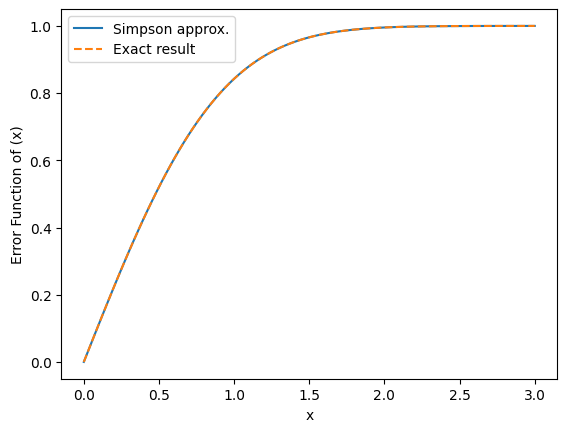

In [34]:
## Arrays
Erf_plot = np.zeros(len(x_plot))    # Create an array of 0s to fill with the actual values
Erf_exact = np.zeros(len(x_plot))   # Another array for the exact erf

for i in range(0, len(x_plot)):
    Erf_plot[i] = SimpErf(x_plot[i], N)
    Erf_exact[i] = erf(x_plot[i])

## Plot it
py.plot(x_plot, Erf_plot, label="Simpson approx.")
py.plot(x_plot, Erf_exact, "--", label="Exact result")
py.xlabel("x")
py.ylabel("Error Function of (x)")
py.legend()
py.show()

### c) Using `scipy.integrate`

Fortunately, people have been working on numerical integration for a long time and have several more advanced methods.  Often, it's not worth reinventing the wheel, and it's better to simply call an already written _library_ function.  In scipy, we can use the `quad` function for this -- it's found in the `scipy.integrate` module.

- https://docs.scipy.org/doc/scipy/reference/integrate.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

In the simplest form, it takes a function and the limits as arguments:

    from scipy.integrate import quad

    answer = quad(f, a, b)
    
`a` and `b` are numbers, and `f` is a function (either one that you define, or one that is already defined. It returns the answer, and an estimate of what the error in the answer is.

Define two functions: function `Sq` that returns the square of input $x$ and function `SqInt` that computes the integral of $x^2$ from $a$ to $b$ using the `Sq` and the `quad` function. This problem will be autograded by nbgrader.

**Bonus Challenge:** can you make it so that each function has only a `def` line and a `return` line?

In [ ]:
from scipy.integrate import quad
## Define variables
a = 0
b = 10


## Define the functions
def Sq(x):
    return x**2

def SqInt(a, b):
    return quad(Sq, a, b)


## Print results
print("The result of the approximation is", SqInt(a, b)[0])
    # I asked ChatGPT how to only print one element of the set that is returned. 
    # Since 'quad' returns both the integral and the error, I asked how to get one or the other
print("The error from the approximation is", SqInt(a, b)[1])

The result of the approximation is 333.33333333333326
The error from the approximation is 3.700743415417188e-12


I think it would be harder to make the functions using more than 1 line. Since this came naturally, I will take it as a W.

Let me now use quad to check myself on the previous integrals

In [48]:
def cos(x):
    return(np.cos(x**2 - x))


print("The integral for HW 3.3 is", quad(cos, -1, 1) )


The integral for HW 3.3 is (1.5554701650976088, 2.2158278976169646e-14)
